<a href="https://colab.research.google.com/github/Rajdip-projects/OIBSIP/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rajdip-projects/OIBSIP.git

Cloning into 'OIBSIP'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17 (delta 2), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 247.87 KiB | 8.00 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [19]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('/content/OIBSIP/Datasets/spam.csv', encoding='ISO-8859-1')

# Check the first few rows of the DataFrame
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [20]:
# Keep only the necessary columns (v1 and v2)
data = data[['v1', 'v2']]

# Rename the columns
data.columns = ['label', 'text']

# Display the first few rows of the DataFrame to confirm changes
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [21]:
# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
data.isnull().sum()


label    0
text     0
dtype: int64

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to the text column
data['text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['label']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.9506726457399103
Precision: 0.9797979797979798
Recall: 0.6466666666666666
F1 Score: 0.7791164658634537


In [35]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# Preprocess the input mail
input_mail_processed = [preprocess_text(input_mail[0])]

# Convert text to feature vectors
input_data_features = vectorizer.transform(input_mail_processed)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0] == 0):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Ham mail


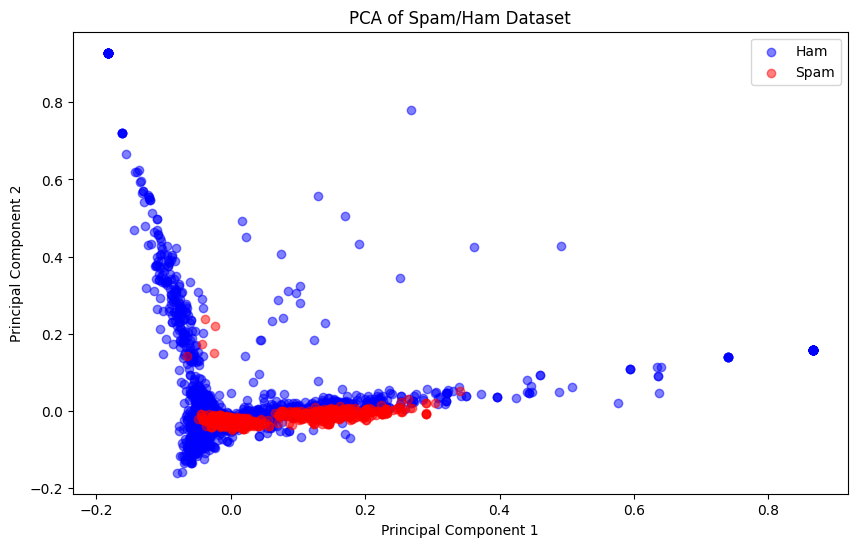

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], c='blue', label='Ham', alpha=0.5)
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], c='red', label='Spam', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spam/Ham Dataset')
plt.legend()
plt.show()

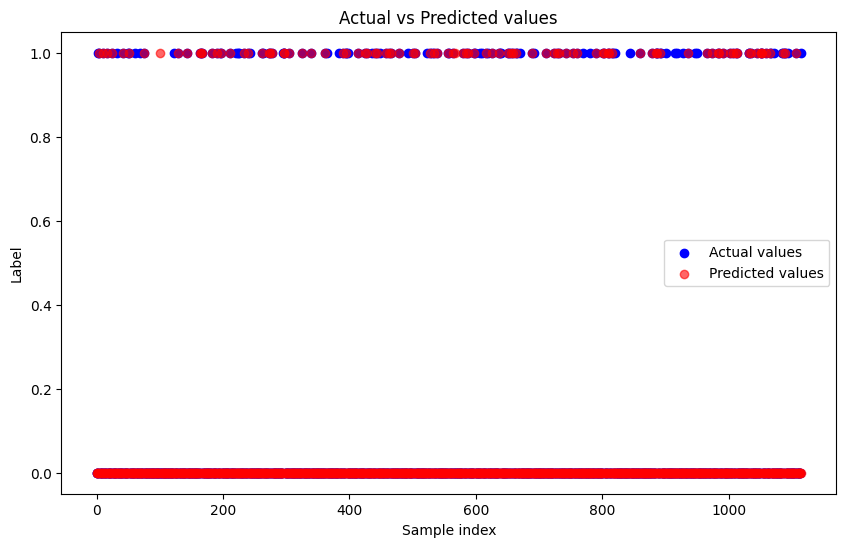

In [37]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted values', alpha=0.6)
plt.xlabel('Sample index')
plt.ylabel('Label')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

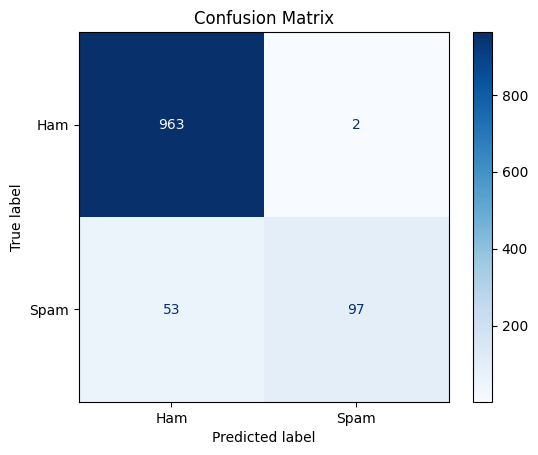

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam'])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()